In [920]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer
import seaborn as sns
pd.options.display.float_format = '{:.6f}'.format

In [921]:
file = pd.read_csv('fifa21_male2.csv', low_memory=False)

In [922]:
file

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,...,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,...,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,...,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,...,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,...,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,259088,A. Medioub,22,64,France,CD Tondela,66,CB,CB,https://cdn.sofifa.com/players/259/088/20_120.png,...,55+2,55+2,54+2,57+2,64+2,64+2,64+2,57+2,12+2,Male
17121,259090,W. Rickard,18,56,Wales,Burnley,58,CAM,CAM CM,https://cdn.sofifa.com/players/259/090/20_120.png,...,52+2,52+2,53+2,52+2,49+2,49+2,49+2,52+2,17+2,Male
17122,259091,C. Barrett,18,56,England,Burnley,56,RB,RB,https://cdn.sofifa.com/players/259/091/20_120.png,...,50+2,50+2,54+2,54+2,54+2,54+2,54+2,54+2,14+2,Male
17123,259101,J. Gazibegović,20,62,Bosnia Herzegovina,SK Sturm Graz,62,RB,RB LB,https://cdn.sofifa.com/players/259/101/20_120.png,...,58+2,58+2,60+2,60+2,58+2,58+2,58+2,60+2,16+2,Male


In [923]:
print(file.columns.tolist())

['ID', 'Name', 'Age', 'OVA', 'Nationality', 'Club', 'BOV', 'BP', 'Position', 'Player Photo', 'Club Logo', 'Flag Photo', 'POT', 'Team & Contract', 'Height', 'Weight', 'foot', 'Growth', 'Joined', 'Loan Date End', 'Value', 'Wage', 'Release Clause', 'Contract', 'Attacking', 'Crossing', 'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement', 'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance', 'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots', 'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle', 'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats', 'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'Hits', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', '

In [924]:
file = file.drop(['ID', 'Player Photo', 'Club Logo', 'Flag Photo'], axis = 1)
file

,Name,Age,OVA,Nationality,Club,BOV,BP,Position,POT,Team & Contract,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,69,Udinese 2008 ~ 2016,...,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,71,KAS Eupen 2014 ~ 2019,...,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,71,Coventry City 2016 ~ 2020,...,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,82,Sunderland 2009,...,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,81,Vissel Kobe 2018 ~ 2021,...,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,A. Medioub,22,64,France,CD Tondela,66,CB,CB,69,"CD Tondela Jun 30, 2021 On Loan",...,55+2,55+2,54+2,57+2,64+2,64+2,64+2,57+2,12+2,Male
17121,W. Rickard,18,56,Wales,Burnley,58,CAM,CAM CM,66,Burnley 2020 ~ 2021,...,52+2,52+2,53+2,52+2,49+2,49+2,49+2,52+2,17+2,Male
17122,C. Barrett,18,56,England,Burnley,56,RB,RB,67,Burnley 2020 ~ 2022,...,50+2,50+2,54+2,54+2,54+2,54+2,54+2,54+2,14+2,Male
17123,J. Gazibegović,20,62,Bosnia Herzegovina,SK Sturm Graz,62,RB,RB LB,73,SK Sturm Graz 2020 ~ 2023,...,58+2,58+2,60+2,60+2,58+2,58+2,58+2,60+2,16+2,Male


In [925]:
file.columns = map(str.lower, file.columns)
file

,name,age,ova,nationality,club,bov,bp,position,pot,team & contract,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender
0,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,69,Udinese 2008 ~ 2016,...,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,71,KAS Eupen 2014 ~ 2019,...,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,71,Coventry City 2016 ~ 2020,...,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,82,Sunderland 2009,...,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,81,Vissel Kobe 2018 ~ 2021,...,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,A. Medioub,22,64,France,CD Tondela,66,CB,CB,69,"CD Tondela Jun 30, 2021 On Loan",...,55+2,55+2,54+2,57+2,64+2,64+2,64+2,57+2,12+2,Male
17121,W. Rickard,18,56,Wales,Burnley,58,CAM,CAM CM,66,Burnley 2020 ~ 2021,...,52+2,52+2,53+2,52+2,49+2,49+2,49+2,52+2,17+2,Male
17122,C. Barrett,18,56,England,Burnley,56,RB,RB,67,Burnley 2020 ~ 2022,...,50+2,50+2,54+2,54+2,54+2,54+2,54+2,54+2,14+2,Male
17123,J. Gazibegović,20,62,Bosnia Herzegovina,SK Sturm Graz,62,RB,RB LB,73,SK Sturm Graz 2020 ~ 2023,...,58+2,58+2,60+2,60+2,58+2,58+2,58+2,60+2,16+2,Male


In [926]:
file.dtypes.tolist()

[dtype('O'),
 dtype('int64'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dt

In [927]:
file['wage'] = file['wage'].replace('€', '', regex=True)
file['wage'] = file['wage'].replace('K', '000', regex = True)
file = file[file['wage'] > '0']
file['wage'] = file['wage'].astype(int)

C:\Users\migue\AppData\Local\Temp\ipykernel_23360\2867403600.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file['wage'] = file['wage'].astype(int)


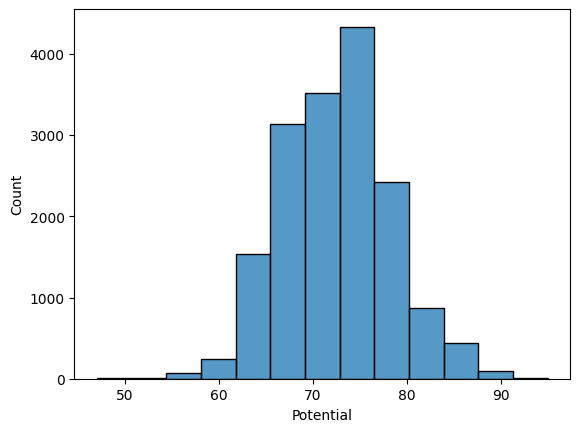

In [928]:
sns.histplot(x=file['pot'], bins=13)
plt.xlabel('Potential')
plt.show()

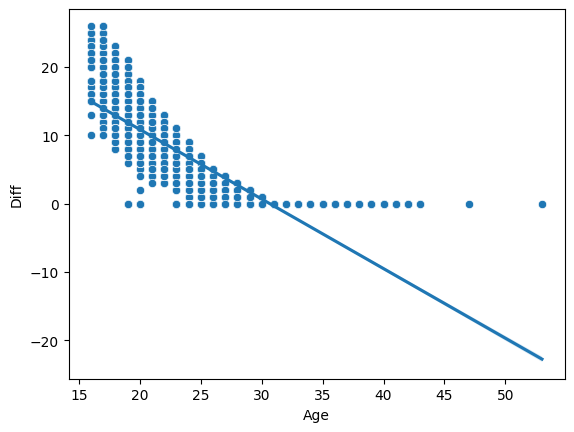

In [929]:
# create scatter plot
sns.scatterplot(x='age', y='growth', data=file)

# plot trendline
sns.regplot(x='age', y='growth', data=file, scatter=False)

plt.xlabel("Age")
plt.ylabel("Diff")

# display plot
plt.show()

In [930]:
file = file[(file['age'] < 27) & (file['pot'] > 80)]

In [931]:
file = pd.DataFrame(file).reset_index()
file

,index,name,age,ova,nationality,club,bov,bp,position,pot,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender
0,402,Nilmar,26,83,Brazil,Villarreal CF,82,ST,ST CF,86,...,52+1,52+1,54+1,48+1,40+1,40+1,40+1,48+1,12+1,Male
1,2846,Dudu,23,77,Brazil,Palmeiras,77,LW,LW LM CAM,82,...,52+0,52+0,57+0,52+0,41+0,41+0,41+0,52+0,18+0,Male
2,3459,R. Barkley,26,78,England,Aston Villa,81,CAM,CM CAM,81,...,70+2,70+2,67+2,65+2,64+2,64+2,64+2,65+2,17+2,Male
3,3679,Paco Alcácer,26,81,Spain,Villarreal CF,82,ST,ST,82,...,53+2,53+2,55+2,52+2,49+2,49+2,49+2,52+2,18+2,Male
4,3680,L. Digne,26,84,France,Everton,84,LB,LB,85,...,80+2,80+2,82+2,82+2,79+2,79+2,79+2,82+2,17+2,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,17080,R. Ortíz,17,62,Paraguay,Estudiantes de La Plata,64,CB,CB,82,...,59+2,59+2,57+2,59+2,62+2,62+2,62+2,59+2,14+2,Male
1131,17083,I. Touré,17,57,France,Le Havre AC,59,CB,CB,81,...,51+2,51+2,52+2,54+2,57+2,57+2,57+2,54+2,14+2,Male
1132,17092,K. Calhanoglu,17,62,Germany,FC Schalke 04,63,LM,LB LM,83,...,58+2,58+2,60+2,60+2,56+2,56+2,56+2,60+2,17+2,Male
1133,17095,L. Delap,17,61,England,Manchester City,63,ST,ST,82,...,38+2,38+2,42+2,40+2,35+2,35+2,35+2,40+2,14+2,Male


In [932]:
file = file.drop(['index'], axis = 1)

In [933]:
yearly_wages = file['wage'] * 52 * 4
yearly_wages

0       18720000
1       16640000
2       12064000
3        9360000
4       22880000
          ...   
1130      104000
1131      104000
1132      104000
1133      624000
1134      104000
Name: wage, Length: 1135, dtype: int32

In [934]:
file['release clause'] = file['release clause'].replace('€', '', regex=True)
file['release clause'] = file['release clause'].replace('K', '000', regex = True)
file['release clause'] = file['release clause'].replace('\.', '', regex = True)
file['release clause'] = file['release clause'].replace('M', '00000', regex = True)
file['release clause'] = file['release clause'].astype(int)

file['value'] = file['value'].replace('€', '', regex=True)
file['value'] = file['value'].replace('K', '000', regex = True)
file['value'] = file['value'].replace('\.', '', regex = True)
file['value'] = file['value'].replace('M', '00000', regex = True)
file['value'] = file['value'].astype(int)

transfer_value = (file['release clause'] + file['value']) / 2
transfer_value = transfer_value.astype(int)
transfer_value

0        8250000
1        4750000
2        6250000
3       23900000
4       46850000
          ...   
1130      975000
1131      394000
1132     1162500
1133     1075000
1134     1125000
Length: 1135, dtype: int32

In [935]:
total_value = yearly_wages + transfer_value
total_value

0       26970000
1       21390000
2       18314000
3       33260000
4       69730000
          ...   
1130     1079000
1131      498000
1132     1266500
1133     1699000
1134     1229000
Length: 1135, dtype: int32

In [936]:
data = pd.DataFrame(file['name'])
data['age'] = file['age']
data

,name,age
0,Nilmar,26
1,Dudu,23
2,R. Barkley,26
3,Paco Alcácer,26
4,L. Digne,26
...,...,...
1130,R. Ortíz,17
1131,I. Touré,17
1132,K. Calhanoglu,17
1133,L. Delap,17


In [937]:
data['total_value'] = total_value
data

,name,age,total_value
0,Nilmar,26,26970000
1,Dudu,23,21390000
2,R. Barkley,26,18314000
3,Paco Alcácer,26,33260000
4,L. Digne,26,69730000
...,...,...,...
1130,R. Ortíz,17,1079000
1131,I. Touré,17,498000
1132,K. Calhanoglu,17,1266500
1133,L. Delap,17,1699000


In [938]:
data['overall'] = file['ova']
data['potential'] = file['pot']
data['diff'] = file['growth']
data

,name,age,total_value,overall,potential,diff
0,Nilmar,26,26970000,83,86,3
1,Dudu,23,21390000,77,82,5
2,R. Barkley,26,18314000,78,81,3
3,Paco Alcácer,26,33260000,81,82,1
4,L. Digne,26,69730000,84,85,1
...,...,...,...,...,...,...
1130,R. Ortíz,17,1079000,62,82,20
1131,I. Touré,17,498000,57,81,24
1132,K. Calhanoglu,17,1266500,62,83,21
1133,L. Delap,17,1699000,61,82,21


In [939]:
data['positions'] = file['bp']
data

,name,age,total_value,overall,potential,diff,positions
0,Nilmar,26,26970000,83,86,3,ST
1,Dudu,23,21390000,77,82,5,LW
2,R. Barkley,26,18314000,78,81,3,CAM
3,Paco Alcácer,26,33260000,81,82,1,ST
4,L. Digne,26,69730000,84,85,1,LB
...,...,...,...,...,...,...,...
1130,R. Ortíz,17,1079000,62,82,20,CB
1131,I. Touré,17,498000,57,81,24,CB
1132,K. Calhanoglu,17,1266500,62,83,21,LM
1133,L. Delap,17,1699000,61,82,21,ST


In [940]:
data_st = data[(data['positions'] == 'ST') | (data['positions'] == 'CF') | (data['positions'] == 'LW') | (data['positions'] == 'RW')]
data_st

,name,age,total_value,overall,potential,diff,positions
0,Nilmar,26,26970000,83,86,3,ST
1,Dudu,23,21390000,77,82,5,LW
3,Paco Alcácer,26,33260000,81,82,1,ST
5,H. Kane,26,119410000,88,89,1,ST
8,Deulofeu,26,30350000,80,81,1,RW
...,...,...,...,...,...,...,...
1116,W. Faghir,16,551000,58,83,25,ST
1117,S. Mara,17,1820500,63,84,21,ST
1120,A. Musaba,19,1424000,67,81,14,ST
1133,L. Delap,17,1699000,61,82,21,ST


In [941]:
data_st['positioning'] = file['positioning'].astype(int)
data_st['finishing'] = file['finishing']
data_st['dribbling'] = file['dribbling']
data_st['acceleration'] = file['acceleration']
data_st['agility'] = file['agility'].astype(int)
data_st['shot_power'] = file['shot power']
data_st['penalties'] = file['penalties']
data_st['heading_accuracy'] = file['heading accuracy']
data_st['volleys'] = file['volleys']
data_st

C:\Users\migue\AppData\Local\Temp\ipykernel_23360\2550441298.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_st['positioning'] = file['positioning'].astype(int)
C:\Users\migue\AppData\Local\Temp\ipykernel_23360\2550441298.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_st['finishing'] = file['finishing']
C:\Users\migue\AppData\Local\Temp\ipykernel_23360\2550441298.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

,name,age,total_value,overall,potential,diff,positions,positioning,finishing,dribbling,acceleration,agility,shot_power,penalties,heading_accuracy,volleys
0,Nilmar,26,26970000,83,86,3,ST,81,85,87,90,86,77,75,78,81.000000
1,Dudu,23,21390000,77,82,5,LW,73,69,84,85,90,70,58,57,60.000000
3,Paco Alcácer,26,33260000,81,82,1,ST,86,85,78,79,82,82,71,78,85.000000
5,H. Kane,26,119410000,88,89,1,ST,93,94,80,66,69,91,90,85,85.000000
8,Deulofeu,26,30350000,80,81,1,RW,77,75,87,89,93,77,77,40,72.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1116,W. Faghir,16,551000,58,83,25,ST,56,62,56,62,66,65,53,48,51.000000
1117,S. Mara,17,1820500,63,84,21,ST,66,68,59,71,66,59,62,65,53.000000
1120,A. Musaba,19,1424000,67,81,14,ST,61,67,71,81,78,70,59,58,63.000000
1133,L. Delap,17,1699000,61,82,21,ST,58,62,59,77,74,64,60,59,60.000000


In [942]:
X_st = data_st._get_numeric_data()
X_st = X_st.drop(['total_value'], axis=1)

In [943]:
imputer_st = SimpleImputer(strategy='mean')

X_st = pd.DataFrame(imputer_st.fit_transform(X_st), columns=X_st.columns)

In [944]:
for col in X_st.columns:
    if col != 'potential':
        X_st[col] = np.log(X_st[col])
X_st.index = data_st.index
X_st.replace([np.inf, -np.inf, 0], np.nan, inplace=True)
X_st.dropna(inplace=True)
Y_st = X_st['potential']
X_st = X_st.drop(['potential'], axis=1)

In [945]:
X_st = sm.add_constant(X_st)

In [946]:
x_st_train, x_st_test, y_st_train, y_st_test = train_test_split(X_st, Y_st, test_size= 0.2, random_state= 100)

In [947]:
# Reset the index for x_train and y_train
x_st_train = x_st_train.reset_index(drop=True)
y_st_train = y_st_train.reset_index(drop=True)

# Fit the OLS model
model_st = sm.OLS(Y_st, X_st).fit()

In [948]:
predictions_st = model_st.predict(X_st)

In [949]:
r2_score(Y_st, predictions_st)

0.7201100156278655

In [950]:
final_st = pd.concat([Y_st, predictions_st],axis=1)

In [951]:
final_st = data_st[data_st.index.isin(final_st.index)]
final_st

,name,age,total_value,overall,potential,diff,positions,positioning,finishing,dribbling,acceleration,agility,shot_power,penalties,heading_accuracy,volleys
0,Nilmar,26,26970000,83,86,3,ST,81,85,87,90,86,77,75,78,81.000000
1,Dudu,23,21390000,77,82,5,LW,73,69,84,85,90,70,58,57,60.000000
11,R. Sterling,25,162210000,88,90,2,LW,92,85,90,96,94,78,69,46,67.000000
15,M. Niang,25,23692000,78,81,3,ST,78,79,81,77,72,87,75,69,72.000000
17,M. Batshuayi,26,13130000,78,81,3,ST,81,81,78,75,75,81,67,75,77.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1116,W. Faghir,16,551000,58,83,25,ST,56,62,56,62,66,65,53,48,51.000000
1117,S. Mara,17,1820500,63,84,21,ST,66,68,59,71,66,59,62,65,53.000000
1120,A. Musaba,19,1424000,67,81,14,ST,61,67,71,81,78,70,59,58,63.000000
1133,L. Delap,17,1699000,61,82,21,ST,58,62,59,77,74,64,60,59,60.000000


In [952]:
final_st = final_st.reindex(columns=['name','total_value', 'overall', 'potential'])
final_st['potential_predicted'] = predictions_st.astype(int)
final_st

,name,total_value,overall,potential,potential_predicted
0,Nilmar,26970000,83,86,83
1,Dudu,21390000,77,82,82
11,R. Sterling,162210000,88,90,85
15,M. Niang,23692000,78,81,80
17,M. Batshuayi,13130000,78,81,80
...,...,...,...,...,...
1116,W. Faghir,551000,58,83,79
1117,S. Mara,1820500,63,84,82
1120,A. Musaba,1424000,67,81,82
1133,L. Delap,1699000,61,82,80


In [953]:
data['potential'].isna().value_counts()

False    1135
Name: potential, dtype: int64

In [954]:
data_m = data[(data['positions'] == 'CDM') | (data['positions'] == 'CM') | (data['positions'] == 'LDM') | (data['positions'] == 'RDM') | (data['positions'] == 'CAM') | (data['positions'] == 'LAM') 
              | (data['positions'] == 'RAM') | (data['positions'] == 'LM') | (data['positions'] == 'RM')]
data_m

,name,age,total_value,overall,potential,diff,positions
2,R. Barkley,26,18314000,78,81,3,CAM
6,J. Draxler,26,42656000,80,81,1,CAM
9,M. Depay,26,96070000,85,88,3,CAM
10,Suso,26,29012000,81,81,0,CAM
19,M. Sabitzer,26,19484000,83,85,2,CAM
...,...,...,...,...,...,...,...
1119,A. Baldi,18,1056000,62,81,19,CDM
1123,A. Arli,17,1416500,63,81,18,CAM
1128,L. Sučić,17,1074800,62,81,19,CAM
1129,C. Olivera,18,2308000,66,84,18,CAM


In [955]:
data_m['positioning'] = file['positioning'].astype(int)
data_m['fk_accuracy'] = file['fk accuracy']
data_m['dribbling'] = file['dribbling']
data_m['long_passing'] = file['long passing']
data_m['agility'] = file['agility'].astype(int)
data_m['ball_control'] = file['ball control']
data_m['stamina'] = file['stamina']
data_m['strength'] = file['strength']
data_m['interceptions'] = file['interceptions']
data_m['vision'] = file['vision']
data_m['short_passing'] = file['short passing']
data_m['curve'] = file['curve']
data_m['aggression'] = file['aggression']
data_m['composure'] = file['composure']
data_m['standing_tackle'] = file['standing tackle']
data_m

C:\Users\migue\AppData\Local\Temp\ipykernel_23360\4221013944.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_m['positioning'] = file['positioning'].astype(int)
C:\Users\migue\AppData\Local\Temp\ipykernel_23360\4221013944.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_m['fk_accuracy'] = file['fk accuracy']
C:\Users\migue\AppData\Local\Temp\ipykernel_23360\4221013944.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

,name,age,total_value,overall,potential,diff,positions,positioning,fk_accuracy,dribbling,...,ball_control,stamina,strength,interceptions,vision,short_passing,curve,aggression,composure,standing_tackle
2,R. Barkley,26,18314000,78,81,3,CAM,75,73,83,...,84,69,76,54.000000,80.000000,83,69.000000,74,80.000000,60
6,J. Draxler,26,42656000,80,81,1,CAM,78,76,83,...,84,68,66,66.000000,81.000000,81,77.000000,48,78.000000,64
9,M. Depay,26,96070000,85,88,3,CAM,84,86,85,...,84,81,81,28.000000,84.000000,81,85.000000,75,78.000000,31
10,Suso,26,29012000,81,81,0,CAM,75,80,87,...,88,74,55,20.000000,82.000000,84,87.000000,23,76.000000,23
19,M. Sabitzer,26,19484000,83,85,2,CAM,83,78,79,...,82,84,76,64.000000,83.000000,83,75.000000,77,80.000000,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1119,A. Baldi,18,1056000,62,81,19,CDM,35,50,56,...,67,47,58,66.000000,42.000000,67,45.000000,55,43.000000,65
1123,A. Arli,17,1416500,63,81,18,CAM,52,51,70,...,67,51,49,21.000000,62.000000,64,56.000000,43,58.000000,30
1128,L. Sučić,17,1074800,62,81,19,CAM,55,72,66,...,68,62,59,48.000000,62.000000,66,70.000000,54,65.000000,52
1129,C. Olivera,18,2308000,66,84,18,CAM,60,47,70,...,68,50,43,30.000000,65.000000,65,54.000000,57,58.000000,33


In [956]:
# m_arr, lmbda = stats.boxcox(data_m['age'])
# plt.hist(m_arr)
# plt.show()

In [957]:
# ## creating plots for all numeric columns

# #import matplotlib.pyplot as plt
# from scipy.stats import boxcox
# from sklearn.preprocessing import StandardScaler

# # Get all numeric columns
# num_cols = data_m.select_dtypes(include='number').columns.tolist()

# # Create a figure with multiple subplots
# fig, axs = plt.subplots(len(num_cols), 3, figsize=(15, len(num_cols) * 5))

# # Loop through each numeric column
# for i, col in enumerate(num_cols):

#     # Plot the histogram
#     axs[i, 0].hist(data_m[col], bins=1000)
#     axs[i, 0].set_title(f'{col} Histogram')

#     # Apply Box-Cox transformation
#     transformed, lam = boxcox(data_m[col] + 1)
#     axs[i, 1].hist(transformed, bins=20)
#     axs[i, 1].set_title(f'{col} Box-Cox Transformed Histogram')

#     # Apply StandardScaler normalization
#     scaler = StandardScaler()
#     scaled = scaler.fit_transform(data_m[[col]])
#     axs[i, 2].hist(scaled, bins=20)
#     axs[i, 2].set_title(f'{col} StandardScaler Normalized Histogram')

# # Adjust the spacing between subplots
# plt.tight_layout()

# # Show the plot
# plt.show()

In [958]:
X_m = data_m._get_numeric_data()
X_m = X_m.drop(['total_value'], axis=1)

In [959]:
X_m['diff'].value_counts()

6     51
9     47
5     43
7     42
8     39
11    36
10    33
13    31
4     28
3     27
12    25
16    22
14    21
17    19
15    17
18    16
20    15
19    14
1      8
21     8
2      6
0      6
25     3
22     3
23     2
Name: diff, dtype: int64

In [960]:
imputer_m = SimpleImputer(strategy='mean')

X_m = pd.DataFrame(imputer_m.fit_transform(X_m), columns=X_m.columns)

In [961]:
for col in X_m.columns:
    if col != 'potential':
        X_m[col] = np.log(X_m[col])
X_m.index = data_m.index
X_m.replace([np.inf, -np.inf, 0], np.nan, inplace=True)
X_m.dropna(inplace=True)
Y_m = X_m['potential']
X_m = X_m.drop(['potential'], axis=1)


C:\Users\migue\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [962]:
X_m = sm.add_constant(X_m)

In [963]:
x_m_train, x_m_test, y_m_train, y_m_test = train_test_split(X_m, Y_m, test_size= 0.2, random_state= 100)

In [964]:
# Reset the index for x_train and y_train
x_m_train = x_m_train.reset_index(drop=True)
y_m_train = y_m_train.reset_index(drop=True)

# Fit the OLS model
model_m = sm.OLS(Y_m, X_m).fit()

In [965]:
predictions_m = model_m.predict(X_m)

In [966]:
predictions_m.isna().sum()

0

In [967]:
r2_score(Y_m, predictions_m)

0.7596634681843197

In [968]:
final = pd.concat([Y_m, predictions_m],axis=1)

In [969]:
final

,potential,0
2,81.000000,80.509547
9,88.000000,84.762534
19,85.000000,81.956949
22,82.000000,81.504199
23,83.000000,82.126053
...,...,...
1119,81.000000,81.196728
1123,81.000000,81.660553
1128,81.000000,81.001588
1129,84.000000,83.658350


In [970]:
final_m = data_m[data_m.index.isin(final.index)]
final_m

,name,age,total_value,overall,potential,diff,positions,positioning,fk_accuracy,dribbling,...,ball_control,stamina,strength,interceptions,vision,short_passing,curve,aggression,composure,standing_tackle
2,R. Barkley,26,18314000,78,81,3,CAM,75,73,83,...,84,69,76,54.000000,80.000000,83,69.000000,74,80.000000,60
9,M. Depay,26,96070000,85,88,3,CAM,84,86,85,...,84,81,81,28.000000,84.000000,81,85.000000,75,78.000000,31
19,M. Sabitzer,26,19484000,83,85,2,CAM,83,78,79,...,82,84,76,64.000000,83.000000,83,75.000000,77,80.000000,64
22,O. Yokuşlu,26,21226000,77,82,5,CDM,68,65,73,...,76,87,85,76.000000,71.000000,77,72.000000,81,73.000000,75
23,J. Ward-Prowse,25,28664000,79,83,4,CM,67,89,75,...,82,90,56,67.000000,82.000000,85,91.000000,67,79.000000,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1119,A. Baldi,18,1056000,62,81,19,CDM,35,50,56,...,67,47,58,66.000000,42.000000,67,45.000000,55,43.000000,65
1123,A. Arli,17,1416500,63,81,18,CAM,52,51,70,...,67,51,49,21.000000,62.000000,64,56.000000,43,58.000000,30
1128,L. Sučić,17,1074800,62,81,19,CAM,55,72,66,...,68,62,59,48.000000,62.000000,66,70.000000,54,65.000000,52
1129,C. Olivera,18,2308000,66,84,18,CAM,60,47,70,...,68,50,43,30.000000,65.000000,65,54.000000,57,58.000000,33


In [971]:
final_m = final_m.reindex(columns=['name','total_value', 'overall', 'potential'])
final_m['potential_predicted'] = predictions_m.astype(int)
final_m

,name,total_value,overall,potential,potential_predicted
2,R. Barkley,18314000,78,81,80
9,M. Depay,96070000,85,88,84
19,M. Sabitzer,19484000,83,85,81
22,O. Yokuşlu,21226000,77,82,81
23,J. Ward-Prowse,28664000,79,83,82
...,...,...,...,...,...
1119,A. Baldi,1056000,62,81,81
1123,A. Arli,1416500,63,81,81
1128,L. Sučić,1074800,62,81,81
1129,C. Olivera,2308000,66,84,83


In [972]:
data_def = data[(data['positions'] == 'CB') | (data['positions'] == 'LCB') | (data['positions'] == 'RCB') | (data['positions'] == 'LB') | (data['positions'] == 'RB')]
data_def

,name,age,total_value,overall,potential,diff,positions
4,L. Digne,26,69730000,84,85,1,LB
7,E. Dier,26,27634000,78,82,4,CB
12,J. Lascelles,26,18096000,77,81,4,CB
13,J. Stones,26,47030000,80,83,3,CB
14,Héctor Bellerín B,25,41858000,80,85,5,RB
...,...,...,...,...,...,...,...
1122,Bruno Fuchs,21,10802000,72,83,11,CB
1124,B. Soppy,18,1374000,66,81,15,RB
1126,C. Riad,17,266500,59,84,25,CB
1130,R. Ortíz,17,1079000,62,82,20,CB


In [973]:
data_def['positioning'] = file['positioning'].astype(int)
data_def['short passing'] = file['short passing']
data_def['long passing'] = file['long passing']
data_def['power'] = file['power']
data_def['jumping'] = file['jumping'].astype(int)
data_def['strength'] = file['strength']
data_def['interceptions'] = file['interceptions']
data_def['heading_accuracy'] = file['heading accuracy']
data_def['marking'] = file['marking']
data_def['standing tackle'] = file['standing tackle']
data_def['sliding tackle'] = file['sliding tackle']
data_def['aggression'] = file['aggression']
data_def['sprint speed'] = file['sprint speed']
data_def['agility'] = file['agility']
data_def['reactions'] = file['reactions']
data_def['balance'] = file['balance']
data_def['acceleration'] = file['acceleration']

C:\Users\migue\AppData\Local\Temp\ipykernel_23360\1237500114.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_def['positioning'] = file['positioning'].astype(int)
C:\Users\migue\AppData\Local\Temp\ipykernel_23360\1237500114.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_def['short passing'] = file['short passing']
C:\Users\migue\AppData\Local\Temp\ipykernel_23360\1237500114.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

In [974]:
d_numeric = data_def._get_numeric_data()
d_numeric

,age,total_value,overall,potential,diff,positioning,short passing,long passing,power,jumping,...,heading_accuracy,marking,standing tackle,sliding tackle,aggression,sprint speed,agility,reactions,balance,acceleration
4,26,69730000,84,85,1,72,81,73,405,92,...,71,78,83,84.000000,76,78,69.000000,83,78.000000,78
7,26,27634000,78,82,4,53,75,78,384,78,...,83,82,80,81.000000,89,54,48.000000,79,38.000000,51
12,26,18096000,77,81,4,23,65,57,305,85,...,79,79,77,76.000000,83,60,67.000000,75,51.000000,55
13,26,47030000,80,83,3,49,80,75,319,81,...,81,81,84,81.000000,78,71,60.000000,78,59.000000,64
14,25,41858000,80,85,5,67,77,59,292,64,...,60,76,78,79.000000,72,86,78.000000,79,77.000000,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1122,21,10802000,72,83,11,45,72,74,338,60,...,68,75,73,69.000000,71,74,62.000000,73,72.000000,66
1124,18,1374000,66,81,15,59,61,53,321,74,...,58,56,64,62.000000,65,83,76.000000,59,75.000000,78
1126,17,266500,59,84,25,28,58,49,255,65,...,62,51,67,65.000000,54,58,56.000000,49,65.000000,59
1130,17,1079000,62,82,20,43,57,55,271,69,...,58,61,67,66.000000,66,65,55.000000,54,67.000000,62


In [975]:
X_d = d_numeric.drop(["potential","total_value"],axis=1)
Y_d = d_numeric["potential"]
Y_d


4       85
7       82
12      81
13      83
14      85
        ..
1122    83
1124    81
1126    84
1130    82
1131    81
Name: potential, Length: 291, dtype: int64

In [976]:
for col in X_d.columns:
    transformed_col, lam = stats.boxcox(X_d[col] + 1)
    X_d[col] = transformed_col

In [977]:
X_d_train, X_d_test, y_d_train, y_d_test = train_test_split(X_d,Y_d,test_size=0.2,random_state=100)

In [978]:
model_d = sm.OLS(y_d_train,X_d_train).fit()

In [979]:
predictions_d = model_d.predict(X_d_test)

In [980]:
r2_score(y_d_test,predictions_d)

0.8255225905856229

In [981]:
final_d = pd.concat([data_def['name'], d_numeric], axis=1)
final_d['potential_predicted']= model_d.predict(X_d).astype(int)

In [982]:
final_d['potential_predicted'].isna().value_counts()

False    291
Name: potential_predicted, dtype: int64

In [983]:
final_d = final_d.reindex(columns=['name', 'total_value', 'overall', 'potential', 'potential_predicted'])

final_d

,name,total_value,overall,potential,potential_predicted
4,L. Digne,69730000,84,85,82
7,E. Dier,27634000,78,82,81
12,J. Lascelles,18096000,77,81,80
13,J. Stones,47030000,80,83,81
14,Héctor Bellerín B,41858000,80,85,84
...,...,...,...,...,...
1122,Bruno Fuchs,10802000,72,83,83
1124,B. Soppy,1374000,66,81,81
1126,C. Riad,266500,59,84,81
1130,R. Ortíz,1079000,62,82,81


In [984]:
data_gk = pd.DataFrame(columns=['gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes'])


data_gk = data[data['positions'] == 'GK']

In [985]:
data_gk['gk_diving'] = file['gk diving']
data_gk['gk_handling'] = file['gk handling']
data_gk['gk_kicking'] = file['gk kicking']
data_gk['gk_positioning'] = file['gk positioning']
data_gk['short_passing'] = file['short passing']
data_gk['long_passing'] = file['long passing']
data_gk['reactions'] = file['reactions']
data_gk['jumping'] = file['jumping']
data_gk['positioning'] = file['positioning']

data_gk

C:\Users\migue\AppData\Local\Temp\ipykernel_23360\3663453324.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_gk['gk_diving'] = file['gk diving']
C:\Users\migue\AppData\Local\Temp\ipykernel_23360\3663453324.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_gk['gk_handling'] = file['gk handling']
C:\Users\migue\AppData\Local\Temp\ipykernel_23360\3663453324.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

,name,age,total_value,overall,potential,diff,positions,gk_diving,gk_handling,gk_kicking,gk_positioning,short_passing,long_passing,reactions,jumping,positioning
20,J. Pickford,26,31160000,81,84,3,GK,81,77,87,77,55,56,80,77.000000,18.000000
26,A. Cragno,26,29556000,81,85,4,GK,84,78,69,76,26,25,71,74.000000,15.000000
29,Y. Mvogo,26,6454000,76,81,5,GK,80,74,71,72,24,22,71,71.000000,13.000000
32,Kepa,25,37608000,82,86,4,GK,81,82,85,79,51,52,73,71.000000,15.000000
54,Ederson,26,72460000,88,91,3,GK,86,82,93,86,57,59,87,66.000000,20.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,L. Chevalier,18,1041500,61,83,22,GK,61,58,62,58,17,15,59,48.000000,7.000000
1007,M. Carnesecchi,20,3248000,66,82,16,GK,65,66,58,66,35,29,59,40.000000,8.000000
1008,J. Markovič,18,3554000,69,84,15,GK,71,71,76,69,32,38,41,57.000000,10.000000
1110,J. Olschowsky,18,1187300,63,81,18,GK,64,63,64,65,18,25,50,78.000000,8.000000


In [986]:
gk_numerical = data_gk._get_numeric_data()
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
data[numerical_columns] = data[numerical_columns].astype(int)

In [987]:
X_gk = gk_numerical.drop(["potential","total_value"],axis=1)
Y_gk = gk_numerical["potential"]
Y_gk

20      84
26      85
29      81
32      86
54      91
        ..
990     83
1007    82
1008    84
1110    81
1125    82
Name: potential, Length: 64, dtype: int64

In [988]:
for col in X_gk.columns:
    transformed_col, lam = stats.boxcox(X_gk[col] + 1)
    X_gk[col] = transformed_col

In [989]:
X_gk_train, X_gk_test, y_gk_train, y_gk_test = train_test_split(X_gk,Y_gk,test_size=0.2,random_state=85)

In [990]:
model_gk = sm.OLS(y_gk_train,X_gk_train).fit()

In [991]:
predictions_gk = model_gk.predict(X_gk)

In [992]:
r2_score(Y_gk, predictions_gk)

0.8873349221929712

In [993]:
final_gk = pd.concat([data_gk['name'], gk_numerical], axis=1)
final_gk['potential_predicted'] = model_gk.predict(X_gk)

In [994]:
final_gk['potential_predicted'].isna().value_counts()

final_gk

,name,age,total_value,overall,potential,diff,gk_diving,gk_handling,gk_kicking,gk_positioning,short_passing,long_passing,reactions,jumping,positioning,potential_predicted
20,J. Pickford,26,31160000,81,84,3,81,77,87,77,55,56,80,77.000000,18.000000,82.987148
26,A. Cragno,26,29556000,81,85,4,84,78,69,76,26,25,71,74.000000,15.000000,84.446324
29,Y. Mvogo,26,6454000,76,81,5,80,74,71,72,24,22,71,71.000000,13.000000,81.378319
32,Kepa,25,37608000,82,86,4,81,82,85,79,51,52,73,71.000000,15.000000,85.804434
54,Ederson,26,72460000,88,91,3,86,82,93,86,57,59,87,66.000000,20.000000,90.638989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,L. Chevalier,18,1041500,61,83,22,61,58,62,58,17,15,59,48.000000,7.000000,81.168386
1007,M. Carnesecchi,20,3248000,66,82,16,65,66,58,66,35,29,59,40.000000,8.000000,81.408672
1008,J. Markovič,18,3554000,69,84,15,71,71,76,69,32,38,41,57.000000,10.000000,84.869108
1110,J. Olschowsky,18,1187300,63,81,18,64,63,64,65,18,25,50,78.000000,8.000000,81.615612


In [995]:
final_gk = data_gk[data_gk.index.isin(final_gk.index)]

final_gk = final_gk.reindex(columns=['name', 'total_value', 'overall', 'potential'])
final_gk['potential_predicted'] = predictions_gk
final_gk

,name,total_value,overall,potential,potential_predicted
20,J. Pickford,31160000,81,84,82.987148
26,A. Cragno,29556000,81,85,84.446324
29,Y. Mvogo,6454000,76,81,81.378319
32,Kepa,37608000,82,86,85.804434
54,Ederson,72460000,88,91,90.638989
...,...,...,...,...,...
990,L. Chevalier,1041500,61,83,81.168386
1007,M. Carnesecchi,3248000,66,82,81.408672
1008,J. Markovič,3554000,69,84,84.869108
1110,J. Olschowsky,1187300,63,81,81.615612


In [996]:
global_data = pd.concat([final_st, final_m, final_d])
global_data

global_data = global_data.sort_values(by=['potential_predicted', 'total_value'], ascending=[False, True])

In [997]:
global_data_head = global_data.head(50)

In [998]:
global_data_head

,name,total_value,overall,potential,potential_predicted
357,T. Alexander-Arnold,83630000,87,92,92
492,M. de Ligt,87190000,85,92,92
414,J. Sancho,117856000,87,93,91
378,K. Mbappé,187580000,90,95,91
746,João Félix,15808000,81,93,90
1029,Ansu Fati,25792000,76,90,90
632,E. Haaland,56648000,84,92,90
626,Vinícius Jr.,70310000,80,93,90
507,K. Havertz,84540000,85,93,90
319,D. Upamecano,10388000,79,90,89


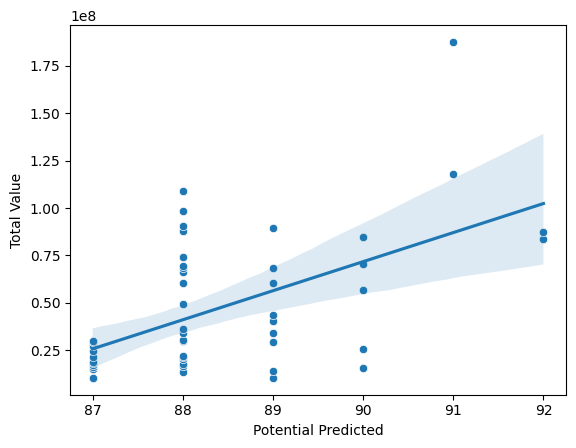

In [999]:
# create scatter plot
sns.scatterplot(x='potential_predicted', y='total_value', data=global_data_head)

# plot trendline
sns.regplot(x='potential_predicted', y='total_value', data=global_data_head, scatter=False)

plt.xlabel("Potential Predicted")
plt.ylabel("Total Value")
# display plot
plt.show()

In [1000]:
global_data_head['price_per_progression'] = global_data_head['total_value'] / (global_data_head['potential_predicted'] - global_data_head['overall'])
global_data_head

C:\Users\migue\AppData\Local\Temp\ipykernel_23360\2250075299.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  global_data_head['price_per_progression'] = global_data_head['total_value'] / (global_data_head['potential_predicted'] - global_data_head['overall'])


,name,total_value,overall,potential,potential_predicted,price_per_progression
357,T. Alexander-Arnold,83630000,87,92,92,16726000.000000
492,M. de Ligt,87190000,85,92,92,12455714.285714
414,J. Sancho,117856000,87,93,91,29464000.000000
378,K. Mbappé,187580000,90,95,91,187580000.000000
746,João Félix,15808000,81,93,90,1756444.444444
1029,Ansu Fati,25792000,76,90,90,1842285.714286
632,E. Haaland,56648000,84,92,90,9441333.333333
626,Vinícius Jr.,70310000,80,93,90,7031000.000000
507,K. Havertz,84540000,85,93,90,16908000.000000
319,D. Upamecano,10388000,79,90,89,1038800.000000


In [1001]:
global_data_head = global_data_head.sort_values(by=['price_per_progression'], ascending = True)
global_data_head = global_data_head.reset_index(drop=True)
global_data_head

,name,total_value,overall,potential,potential_predicted,price_per_progression
0,Pedri,10430000,72,88,87,695333.333333
1,T. Kubo,10578000,75,89,87,881500.000000
2,D. Upamecano,10388000,79,90,89,1038800.000000
3,T. Almada,14964000,73,89,87,1068857.142857
4,E. Camavinga,14240000,76,88,89,1095384.615385
5,M. Ihattaren,13356000,77,88,88,1214181.818182
6,A. Hložek,18254000,74,87,87,1404153.846154
7,M. Boadu,17006000,75,87,87,1417166.666667
8,S. Tonali,16600000,77,91,88,1509090.909091
9,D. Szoboszlai,18670000,75,87,87,1555833.333333
